<a href="https://colab.research.google.com/github/marmurr/Deep-Learning/blob/main/Deep_learning_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Array generation

In [3]:
def generate_array(batch_size : int, shape : list) -> np.ndarray:
  return np.random.randint(-100, 100, size=[batch_size] + shape)


Generating test array for activation functions

In [4]:
array = generate_array(4, [2, 2])
print(array)

[[[  2 -96]
  [-23 -64]]

 [[ -6 -35]
  [-91  50]]

 [[ 43   9]
  [-48 -61]]

 [[-48  79]
  [-14 -90]]]


# Activation functions

## ReLU

In [5]:
def relu(input_array : np.ndarray) -> np.ndarray:
  return np.maximum(0, input_array)

In [6]:
relu(array)

array([[[ 2,  0],
        [ 0,  0]],

       [[ 0,  0],
        [ 0, 50]],

       [[43,  9],
        [ 0,  0]],

       [[ 0, 79],
        [ 0,  0]]])

In [7]:
def relu_derivative(input_array: np.ndarray) -> np.ndarray:
    return np.where(input_array <= 0, 0, 1)

In [8]:
relu_derivative(array)

array([[[1, 0],
        [0, 0]],

       [[0, 0],
        [0, 1]],

       [[1, 1],
        [0, 0]],

       [[0, 1],
        [0, 0]]])

In [9]:
x_values = np.linspace(-10, 10, 100)
relu_values = relu(x_values)
relu_derivative_values = relu_derivative(x_values)

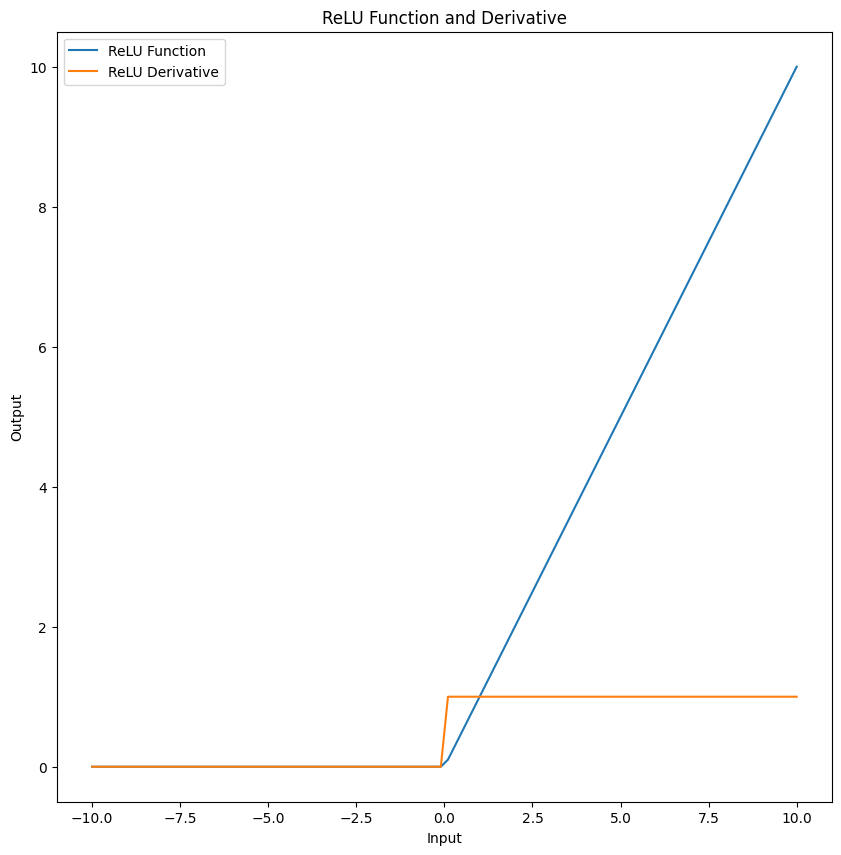

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(x_values, relu_values, label='ReLU Function')
plt.plot(x_values, relu_derivative_values, label='ReLU Derivative')
plt.title('ReLU Function and Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

## ELU


In [11]:
def elu(input_array : np.ndarray, alpha=1.0) -> np.ndarray:
    return np.where(input_array > 0, input_array, alpha * (np.exp(input_array) - 1))

In [12]:
elu(array)

array([[[ 2.        , -1.        ],
        [-1.        , -1.        ]],

       [[-0.99752125, -1.        ],
        [-1.        , 50.        ]],

       [[43.        ,  9.        ],
        [-1.        , -1.        ]],

       [[-1.        , 79.        ],
        [-0.99999917, -1.        ]]])

In [13]:
def elu_derivative(input_array : np.ndarray, alpha=1.0) -> np.ndarray:
    return np.where(input_array > 0, 1, np.exp(input_array) * alpha)

In [14]:
elu_derivative(array)

array([[[1.00000000e+00, 2.03109266e-42],
        [1.02618796e-10, 1.60381089e-28]],

       [[2.47875218e-03, 6.30511676e-16],
        [3.01440879e-40, 1.00000000e+00]],

       [[1.00000000e+00, 1.00000000e+00],
        [1.42516408e-21, 3.22134029e-27]],

       [[1.42516408e-21, 1.00000000e+00],
        [8.31528719e-07, 8.19401262e-40]]])

In [15]:
x_values = np.linspace(-10, 10, 100)
elu_values = elu(x_values)
elu_derivative_values = elu_derivative(x_values)

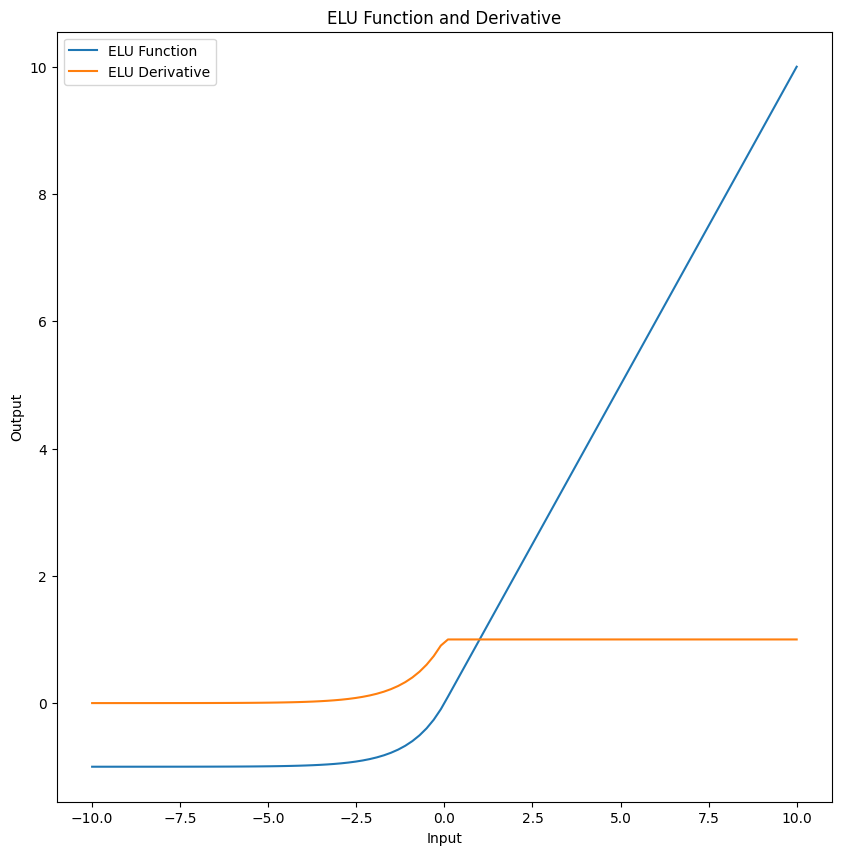

In [16]:
plt.figure(figsize=(10, 10))
plt.plot(x_values, elu_values, label='ELU Function')
plt.plot(x_values, elu_derivative_values, label='ELU Derivative')
plt.title('ELU Function and Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

## Swish

In [17]:
def swish(input_array : np.ndarray) -> np.ndarray:
    return input_array * (1/(1 + np.exp(-input_array)))

In [18]:
swish(array)

array([[[ 1.76159416e+00, -1.94984896e-40],
        [-2.36023232e-09, -1.02643897e-26]],

       [[-1.48357389e-02, -2.20679087e-14],
        [-2.74311199e-38,  5.00000000e+01]],

       [[ 4.30000000e+01,  8.99888945e+00],
        [-6.84078760e-20, -1.96501757e-25]],

       [[-6.84078760e-20,  7.90000000e+01],
        [-1.16413924e-05, -7.37461136e-38]]])

In [19]:
def swish_derivative(input_array : np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-input_array)) + input_array * (1 / (1 + np.exp(-input_array)))*(1 - (1 / (1 + np.exp(-input_array))))

In [20]:
swish_derivative(array)

array([[[ 1.09078425e+00, -1.92953803e-40],
        [-2.25761352e-09, -1.01040086e-26]],

       [[-1.23264326e-02, -2.14373970e-14],
        [-2.71296791e-38,  1.00000000e+00]],

       [[ 1.00000000e+00,  1.00098702e+00],
        [-6.69827119e-20, -1.93280417e-25]],

       [[-6.69827119e-20,  1.00000000e+00],
        [-1.08098547e-05, -7.29267124e-38]]])

In [21]:
x_values = np.linspace(-10, 10, 100)
swish_values = swish(x_values)
swish_derivative_values = swish_derivative(x_values)

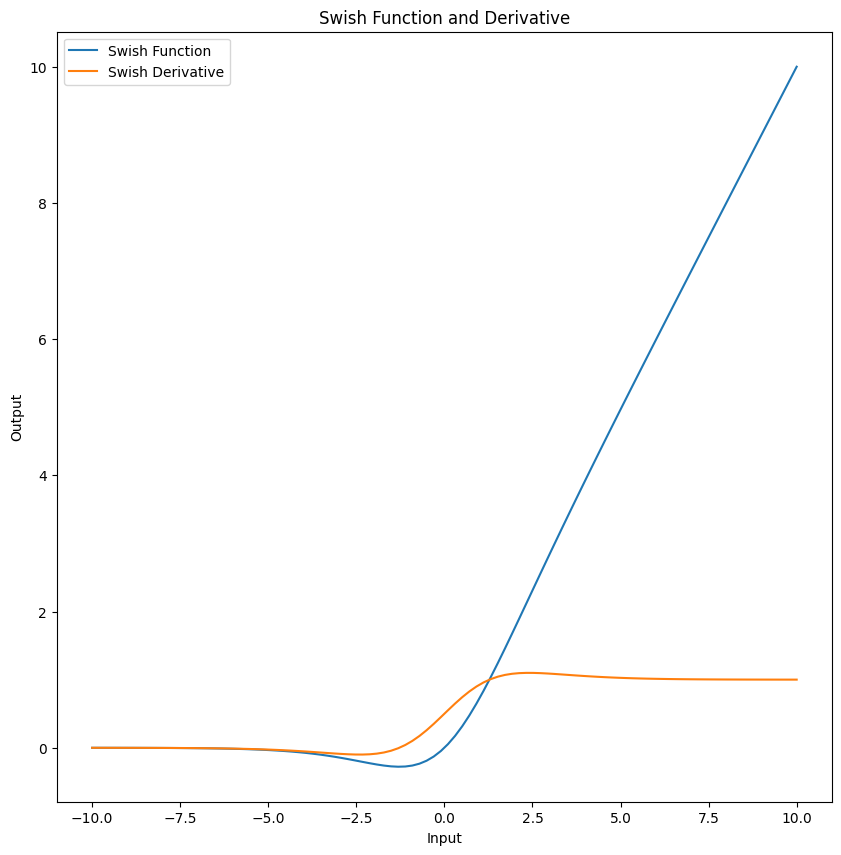

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(x_values, swish_values, label='Swish Function')
plt.plot(x_values, swish_derivative_values, label='Swish Derivative')
plt.title('Swish Function and Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

## Softplus

In [23]:
def softplus(input_array : np.ndarray) -> np.ndarray:
    return np.log(1 + np.exp(input_array))

In [24]:
softplus(array)

array([[[2.12692801e+00, 0.00000000e+00],
        [1.02618802e-10, 0.00000000e+00]],

       [[2.47568514e-03, 6.66133815e-16],
        [0.00000000e+00, 5.00000000e+01]],

       [[4.30000000e+01, 9.00012340e+00],
        [0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 7.90000000e+01],
        [8.31528373e-07, 0.00000000e+00]]])

In [25]:
def softplus_derivative(input_array : np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-input_array))

In [26]:
softplus_derivative(array)

array([[[8.80797078e-01, 2.03109266e-42],
        [1.02618796e-10, 1.60381089e-28]],

       [[2.47262316e-03, 6.30511676e-16],
        [3.01440879e-40, 1.00000000e+00]],

       [[1.00000000e+00, 9.99876605e-01],
        [1.42516408e-21, 3.22134029e-27]],

       [[1.42516408e-21, 1.00000000e+00],
        [8.31528028e-07, 8.19401262e-40]]])

In [27]:
x_values = np.linspace(-10, 10, 100)
softplus_values = softplus(x_values)
softplus_derivative_values = softplus_derivative(x_values)

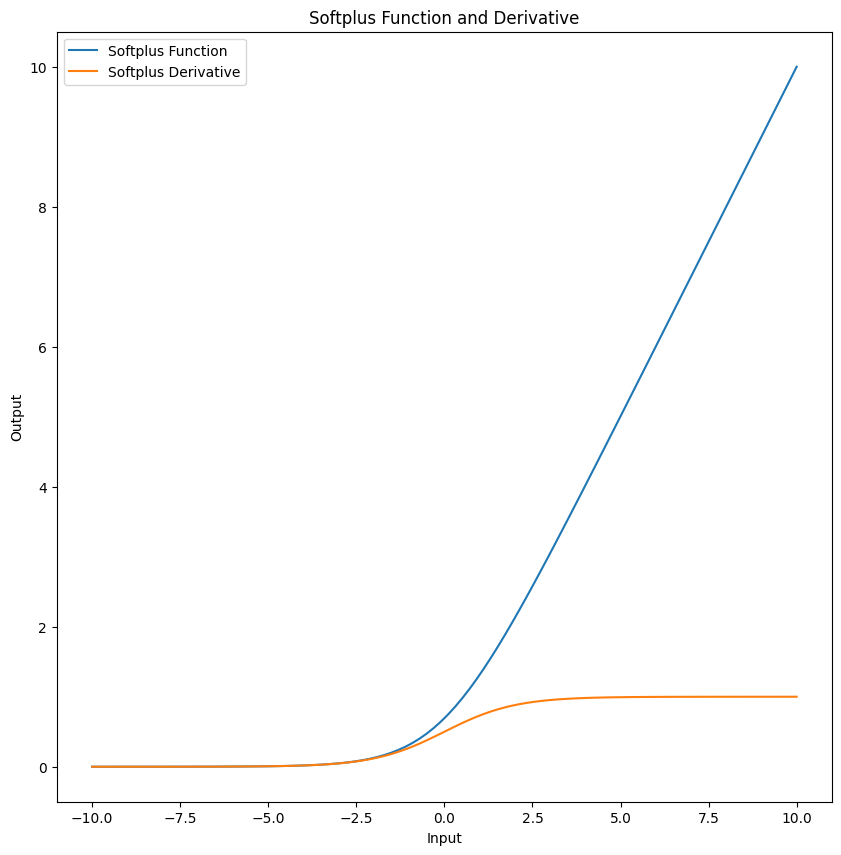

In [28]:
plt.figure(figsize=(10, 10))
plt.plot(x_values, softplus_values, label='Softplus Function')
plt.plot(x_values, softplus_derivative_values, label='Softplus Derivative')
plt.title('Softplus Function and Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

## Mish


In [29]:
def mish(input_array : np.ndarray) -> np.ndarray:
    return input_array * np.tanh(softplus(input_array))

In [30]:
mish(array)

array([[[ 1.94395896e+00, -0.00000000e+00],
        [-2.36023245e-09, -0.00000000e+00]],

       [[-1.48540805e-02, -2.33146835e-14],
        [-0.00000000e+00,  5.00000000e+01]],

       [[ 4.30000000e+01,  8.99999973e+00],
        [-0.00000000e+00, -0.00000000e+00]],

       [[-0.00000000e+00,  7.90000000e+01],
        [-1.16413972e-05, -0.00000000e+00]]])

In [31]:
def mish_derivative(input_array : np.ndarray) -> np.ndarray:
    w = 4 * (input_array + 1) + 4 * np.exp(2 * input_array) + np.exp(3 * input_array) + np.exp(input_array) * (4 * input_array + 6)
    sigma = 2 * np.exp(input_array) + np.exp(2 * input_array) + 2
    return (np.exp(input_array) * w) / (sigma ** 2)

In [32]:
mish_derivative(array)

array([[[ 1.06931793e+00, -1.92953803e-40],
        [-2.25761352e-09, -1.01040086e-26]],

       [[-1.23599679e-02, -2.14373970e-14],
        [-2.71296791e-38,  1.00000000e+00]],

       [[ 1.00000000e+00,  1.00000052e+00],
        [-6.69827119e-20, -1.93280417e-25]],

       [[-6.69827119e-20,  1.00000000e+00],
        [-1.08098640e-05, -7.29267124e-38]]])

In [33]:
x_values = np.linspace(-10, 10, 100)
mish_values = mish(x_values)
mish_derivative_values = mish_derivative(x_values)

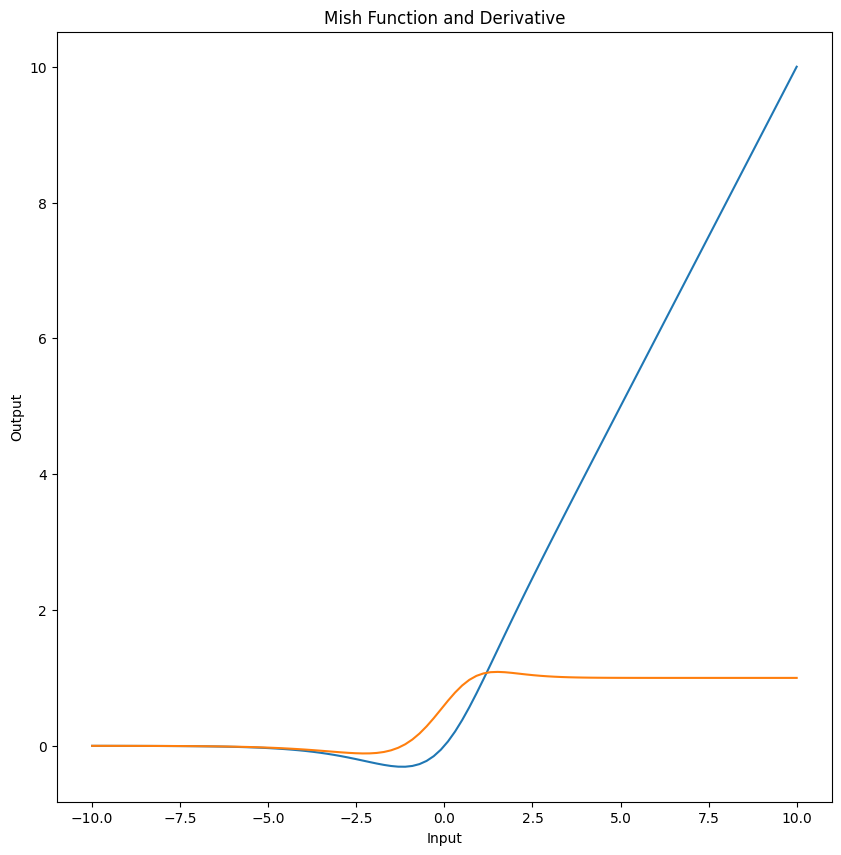

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(x_values, mish_values, label='Mish Function')
plt.plot(x_values, mish_derivative_values, label='Mish Derivative')
plt.title('Mish Function and Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

# Loss functions

## BCE

In [35]:
def bce_loss(y_pred : array, y_true : np.array) -> np.float64:
  return -(y_true * np.log(y_pred)+(1-y_true)*np.log(1-y_pred))

In [36]:
y_pred = np.linspace(0.01, 1, 100)
y_true = np.ones(100)

<ipython-input-35-5ce0c8ceff10>:2: RuntimeWarning: divide by zero encountered in log
  return -(y_true * np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
<ipython-input-35-5ce0c8ceff10>:2: RuntimeWarning: invalid value encountered in multiply
  return -(y_true * np.log(y_pred)+(1-y_true)*np.log(1-y_pred))


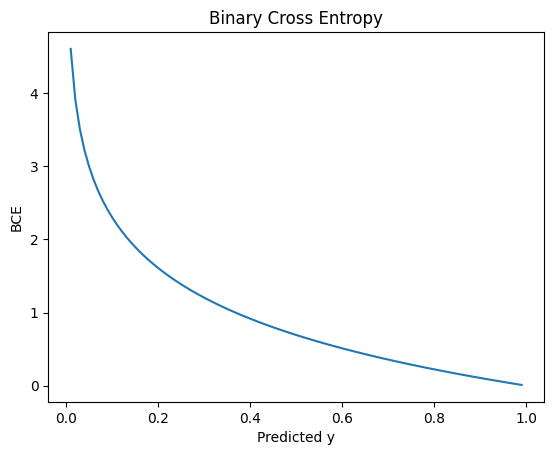

In [37]:
plt.plot(y_pred,  bce_loss(y_pred, y_true));
plt.title('Binary Cross Entropy');
plt.xlabel('Predicted y');
plt.ylabel('BCE');

## Wing loss

In [38]:
def wing_loss(y_true: np.array, y_pred : np.array, w=5, epsilon=6) -> np.float64:
    diff = np.abs(y_true - y_pred)
    quadratic_loss = np.where(diff < w,
                              w * np.log(1 + diff / epsilon),
                              diff - (w - epsilon))

    return quadratic_loss

In [39]:
y_true_values = np.linspace(-10, 10, 100)
y_pred_values = np.zeros_like(y_true_values)
loss_values = wing_loss(y_true_values, y_pred_values)


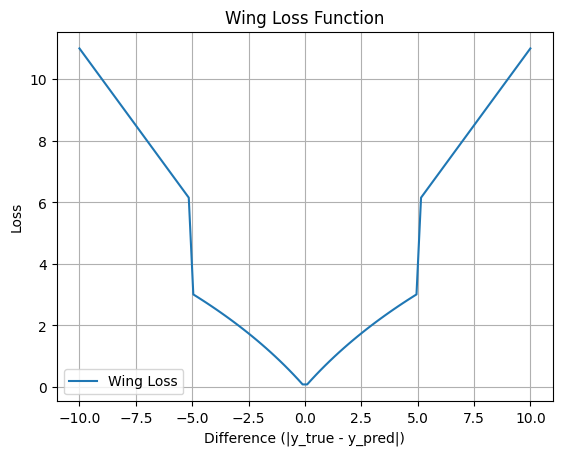

In [40]:
plt.plot(y_true_values, loss_values, label='Wing Loss')
plt.title('Wing Loss Function')
plt.xlabel('Difference (|y_true - y_pred|)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## SmoothL1


In [41]:
def smooth_l1_loss(y_true: np.array, y_pred : np.array) -> np.float64:
    diff = np.abs(y_pred - y_true)
    loss = np.where(diff < 1, 0.5 * diff**2, diff - 0.5)
    return loss

In [42]:
y_true_values = np.linspace(-10, 10, 100)
y_pred_values = np.zeros_like(y_true_values)
loss_values = smooth_l1_loss(y_true_values, y_pred_values)


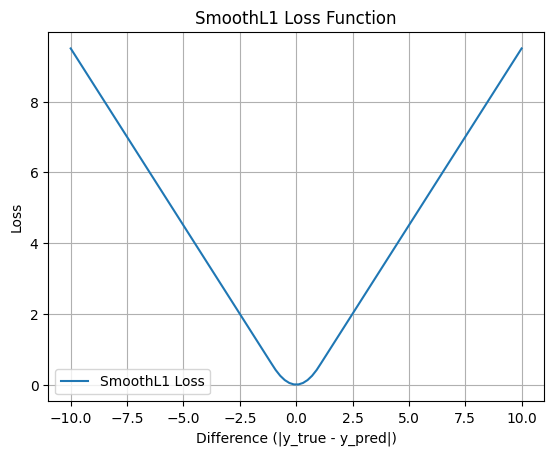

In [43]:
plt.plot(y_true_values, loss_values, label='SmoothL1 Loss')
plt.title('SmoothL1 Loss Function')
plt.xlabel('Difference (|y_true - y_pred|)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Softmargin

In [49]:
def soft_margin_loss(y_true: np.array, y_pred: np.array, C: float) -> float:
    hinge_loss = np.maximum(0, 1 - y_true * y_pred)
    regularization_term = 0.5 * np.dot(y_pred, y_pred)
    soft_margin_loss = hinge_loss + C * regularization_term
    return soft_margin_loss

In [50]:
y_true_values = np.linspace(-10, 10, 100)
y_pred_values = np.zeros_like(y_true_values)
C = 0.1
loss_values = soft_margin_loss(y_true_values, y_pred_values,C)


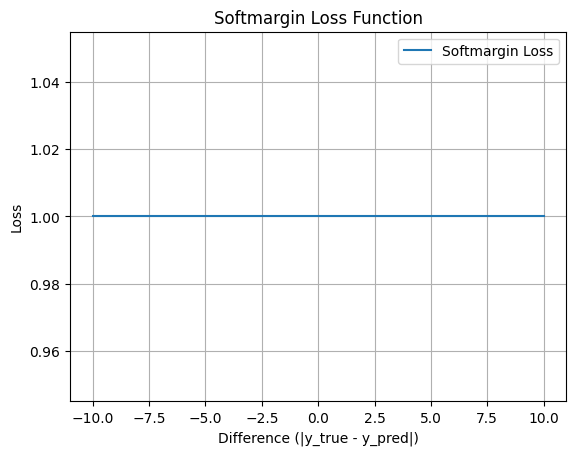

In [51]:
plt.plot(y_true_values, loss_values, label='Softmargin Loss')
plt.title('Softmargin Loss Function')
plt.xlabel('Difference (|y_true - y_pred|)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

T_T